In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

#  Load & Preprocess CIFAR-10 Dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
# Class names for reference
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

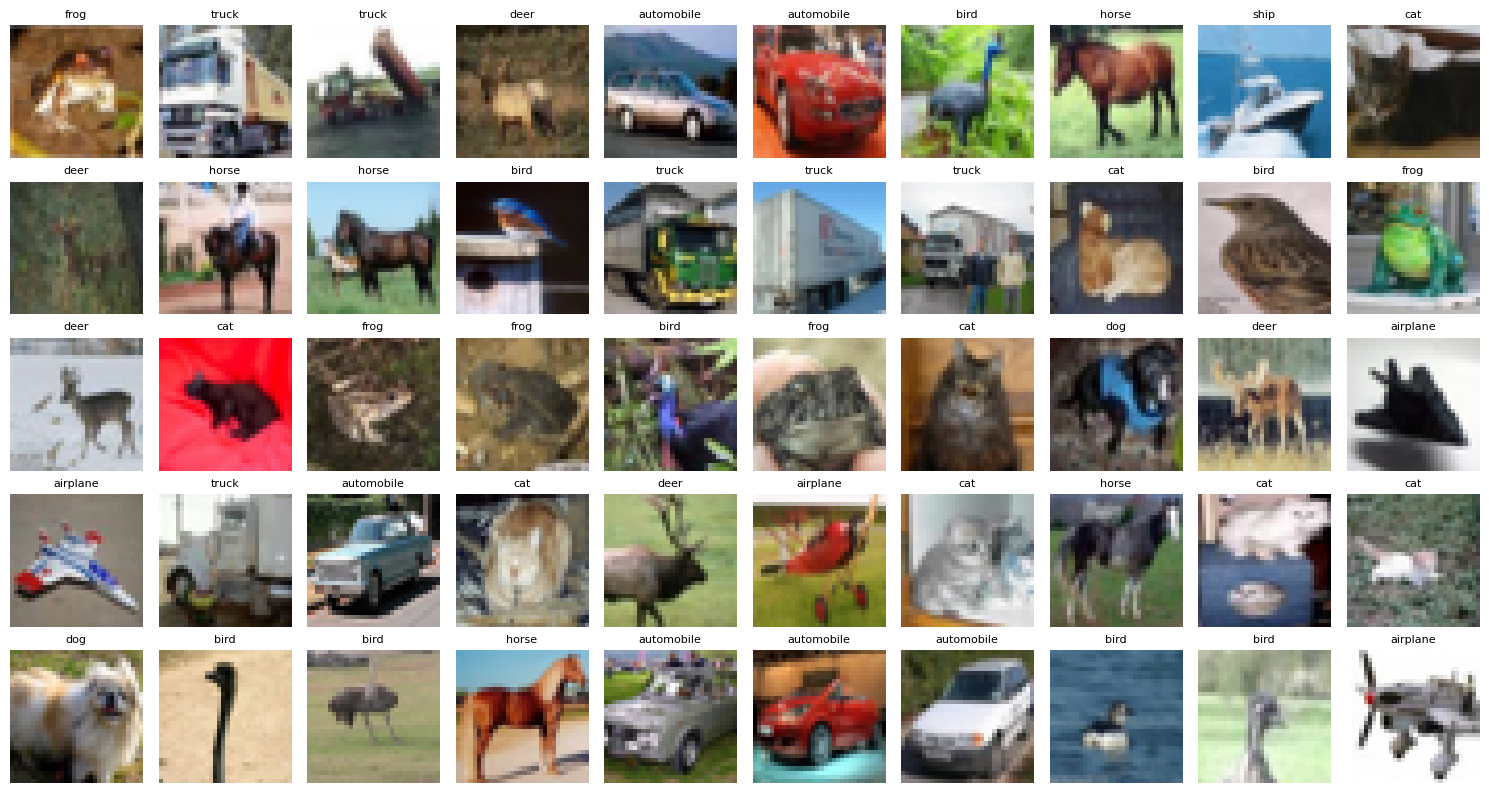

In [ ]:
# Show 50 training images in a 5x10 grid
plt.figure(figsize=(15, 8))
for i in range(50):
    plt.subplot(5, 10, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]], fontsize=8)
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Model building

In [ ]:
def create_cnn_model(optimizer='adam', dropout_rate=0.5):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))  # 10 classes

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train Model with Hyperparameters

In [ ]:
optimizer = Adam(learning_rate=0.001)  # Try SGD(learning_rate=0.01) as well
dropout_rate = 0.3

model = create_cnn_model(optimizer=optimizer, dropout_rate=dropout_rate)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(x_train, y_train_cat, epochs=3, batch_size=64,validation_split=0.2, verbose=1)

Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 97ms/step - accuracy: 0.3260 - loss: 1.8338 - val_accuracy: 0.5264 - val_loss: 1.3507
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 93ms/step - accuracy: 0.5225 - loss: 1.3385 - val_accuracy: 0.5919 - val_loss: 1.1626
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 81ms/step - accuracy: 0.5922 - loss: 1.1652 - val_accuracy: 0.6337 - val_loss: 1.0685


# Evaluate the Model

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6355 - loss: 1.0506

Test Accuracy: 63.29%


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


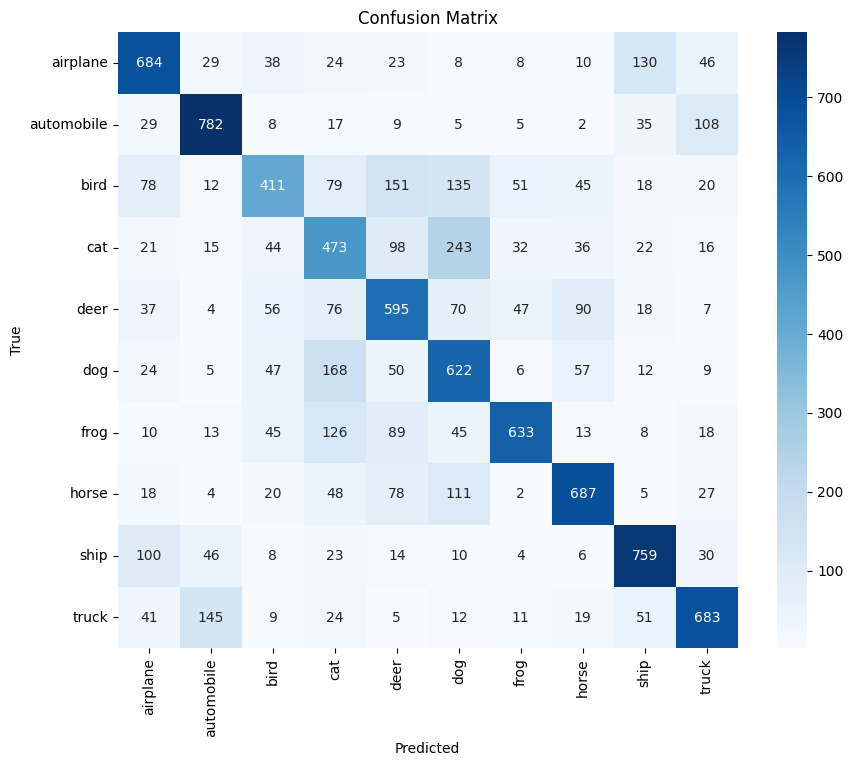

In [ ]:
# Confusion matrix
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
# Classification report
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.66      0.68      0.67      1000
  automobile       0.74      0.78      0.76      1000
        bird       0.60      0.41      0.49      1000
         cat       0.45      0.47      0.46      1000
        deer       0.54      0.59      0.56      1000
         dog       0.49      0.62      0.55      1000
        frog       0.79      0.63      0.70      1000
       horse       0.71      0.69      0.70      1000
        ship       0.72      0.76      0.74      1000
       truck       0.71      0.68      0.70      1000

    accuracy                           0.63     10000
   macro avg       0.64      0.63      0.63     10000
weighted avg       0.64      0.63      0.63     10000



# Plot Training & Validation Accuracy/Loss

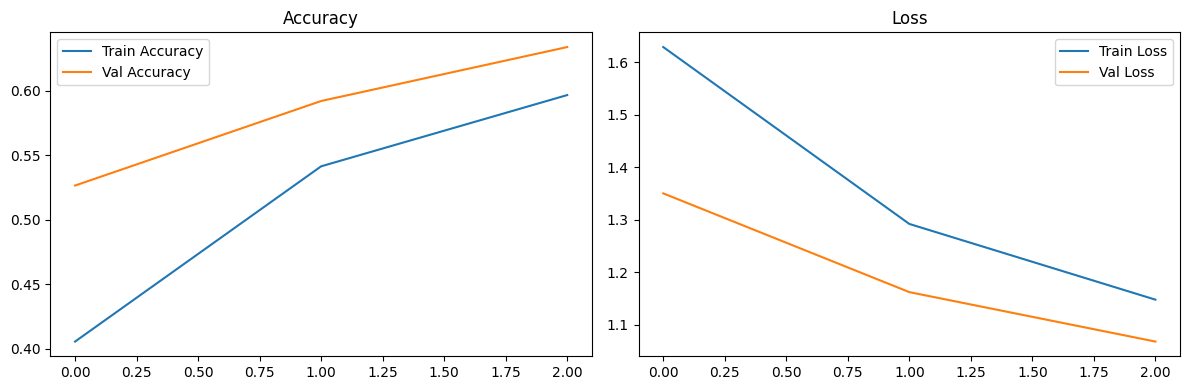

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image
from PIL import Image

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

img_path = input("Enter the path of the image: ")

img = Image.open(img_path).resize((32, 32)).convert('RGB') # Convert to RGB
img_array = image.img_to_array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]

Enter the path of the image: /content/truck.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step



Predicted class: truck


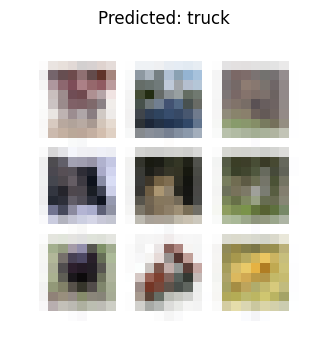

In [ ]:
print(f"\nPredicted class: {predicted_class}")
plt.figure(figsize=(4, 4)) # Set a smaller figure size
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()

In [ ]:
from google.colab import files

Saving truck.png to truck (1).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


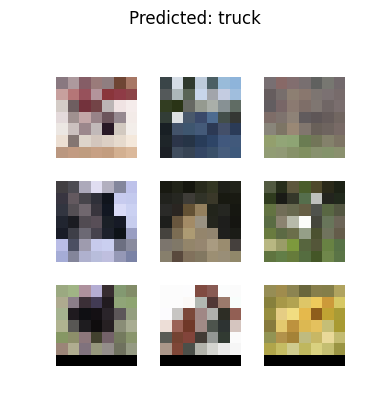

In [ ]:
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    class_label = class_names[class_index]

    plt.imshow(img)
    plt.title(f"Predicted: {class_label}")
    plt.axis('off')
    plt.show()

# Upload image and predict
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
predict_image(img_path)

In [ ]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Flatten , Dropout , MaxPooling2D , Dense
from tensorflow.keras.optimizers import Adam , SGD
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report , confusion_matrix

In [ ]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
class_names_1 = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

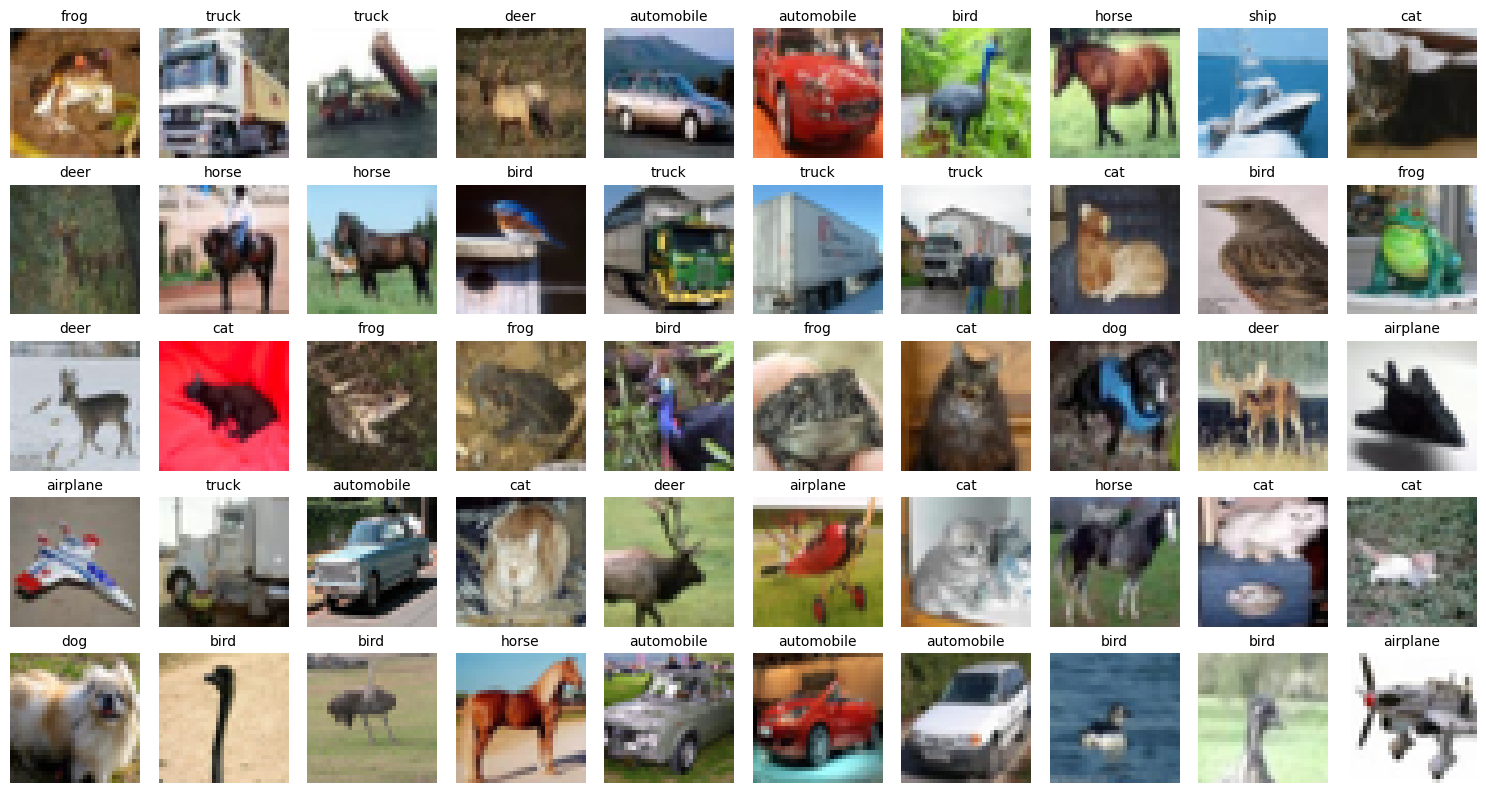

In [ ]:
plt.figure(figsize=(15,8))
for i in range(50):
  plt.subplot(5,10,i+1)
  plt.imshow(x_train[i])
  plt.title(class_names_1[y_train[i][0]],fontsize=10)
  plt.axis('off')
plt.tight_layout()
plt.show()

# # Show 50 training images in a 5x10 grid


In [ ]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [ ]:
y_train_cat = to_categorical(y_train,10)
y_test_cat = to_categorical(y_test,10)

In [ ]:
def create_cnn_model(optimizer = 'adam', dropout_rate = 0.1):
  model = Sequential()

  model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
  model.add(MaxPooling2D((2,2)))

  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(MaxPooling2D((2,2)))

  model.add(Flatten())
  model.add(Dense(128,activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(10,activation='softmax'))

  model.compile(optimizer=optimizer , loss = 'categorical_crossentropy', metrics=['accuracy'])

  return model

In [ ]:
# def create_cnn_model(optimizer='adam', dropout_rate=0.5):
#     model = Sequential()
#     model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)))
#     model.add(MaxPooling2D((2, 2)))

#     model.add(Conv2D(64, (3, 3), activation='relu'))
#     model.add(MaxPooling2D((2, 2)))

#     model.add(Flatten())
#     model.add(Dense(128, activation='relu'))
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(10, activation='softmax'))  # 10 classes

#     model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
#     return model

In [ ]:
optimizer = Adam(learning_rate=0.001)
dropout_rate = 0.3

model = create_cnn_model(optimizer = optimizer,dropout_rate = dropout_rate)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(x_train,y_train_cat , epochs = 3, batch_size = 64 , validation_split=0.2 , verbose=1)

Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 125ms/step - accuracy: 0.3215 - loss: 1.8469 - val_accuracy: 0.5310 - val_loss: 1.3584
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 117ms/step - accuracy: 0.5202 - loss: 1.3500 - val_accuracy: 0.5779 - val_loss: 1.1895
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 118ms/step - accuracy: 0.5772 - loss: 1.1841 - val_accuracy: 0.6123 - val_loss: 1.1040


In [ ]:
y_pred = np.argmax(model.predict(x_test,axis=1))
cm  = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True , fmt='d',cmap='Blues',xtickslabels = class_names_1,ytickslabels = class_names_1 )
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:

test_loss , test_acc = model.evaluate(x_test,y_test_cat)
print(f"Accuracy is :{test_acc*100:.2f}%")

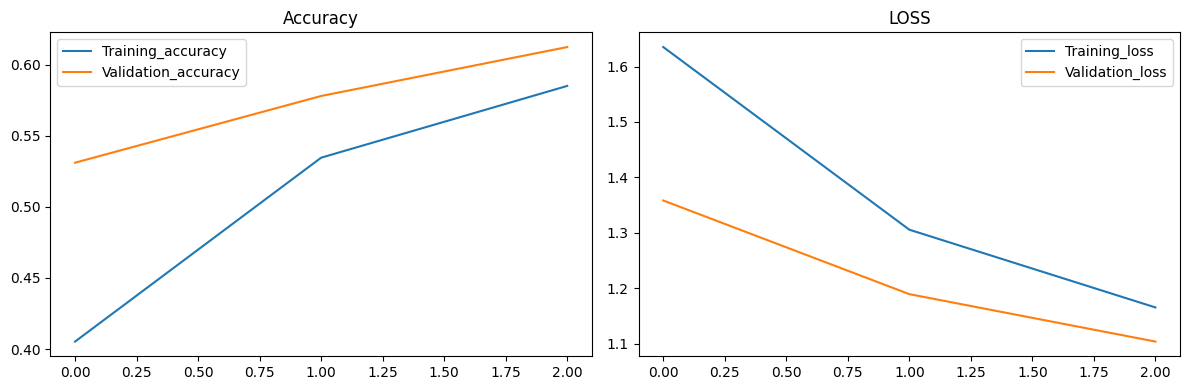

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)

plt.plot(history.history['accuracy'] , label = 'Training_accuracy')
plt.plot(history.history['val_accuracy'] , label = 'Validation_accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'] , label = 'Training_loss')
plt.plot(history.history['val_loss'] , label = 'Validation_loss')

plt.legend()
plt.title("LOSS")

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
from PIL import Image

In [ ]:
class_names_1 = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
import numpy as np

In [ ]:
img_path = input("Enter the path of the image:")

img = Image.open(img_path).resize((32,32)).convert('RGB')
img_array = image.img_to_array(img)/255.0
img_array = np.expand_dims(img_array,axis = 0)

prediction = model.predict(img_array)
prediction_class = class_names_1[np.argmax(prediction)]

# class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
#                'dog', 'frog', 'horse', 'ship', 'truck']

# img_path = input("Enter the path of the image: ")

# img = Image.open(img_path).resize((32, 32)).convert('RGB') # Convert to RGB
# img_array = image.img_to_array(img) / 255.0  # Normalize
# img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# prediction = model.predict(img_array)
# predicted_class = class_names[np.argmax(prediction)]

Enter the path of the image:/content/truck.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Predicted class : truck


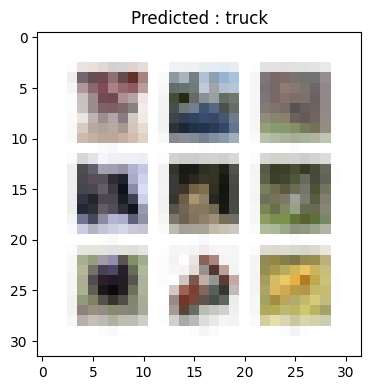

In [ ]:
print(f"Predicted class : {prediction_class}")
plt.figure(figsize=(4,4))
plt.imshow(img)

plt.title(f"Predicted : {prediction_class}")
plt.tight_layout()
plt.show()

# print(f"\nPredicted class: {predicted_class}")
# plt.figure(figsize=(4, 4)) # Set a smaller figure size
# plt.imshow(img)
# plt.title(f"Predicted: {predicted_class}")
# plt.axis('off')
# plt.show()